# Explore here

Proyecto Naive Bayes
     
       Objetivo: Crear un clasificador de reseñas de la tienda de Google Play.

In [4]:
!pip install missingno lazypredict
!pip install statsmodels
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import numpy as np
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import *
from imblearn.metrics import specificity_score
from sklearn.feature_extraction.text import TfidfVectorizer


1. Cargar el conjunto de datos.

In [6]:
#1) Descargo los datos:

#a) Leo los datos de la URL.
url = "https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv"

#b) Guardo los datos en un DataFrame.
df = pd.read_csv(url)

#c) Miro las primeras filas del DF.
print(df.head())

          package_name                                             review  \
0  com.facebook.katana   privacy at least put some option appear offli...   
1  com.facebook.katana   messenger issues ever since the last update, ...   
2  com.facebook.katana   profile any time my wife or anybody has more ...   
3  com.facebook.katana   the new features suck for those of us who don...   
4  com.facebook.katana   forced reload on uploading pic on replying co...   

   polarity  
0         0  
1         0  
2         0  
3         0  
4         0  


2. Estudio de variables y su contenido.

In [7]:
# Elimino la variable "package_name", que representa la aplicación donde se ha escrito el comentario, porque el hecho de clasificar un comentario en positivo o negativo dependerá de su contenido, no de la aplicación de la que se haya escrito.
df = df.drop(['package_name'], axis=1)

In [8]:
# Elimino los espacios de los comentarios y convierto el texto a minúsculas.
df["review"] = df["review"].str.strip().str.lower()

In [9]:
# Dividir el conjunto de datos en train y test.
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['polarity'], test_size=0.2, random_state=42)

3. Construir un Naive Bayes.

3.1. Vectorizar para una multinomial. Para ello, debe contar el número de veces que se repite cada palabra en cada reseña.

In [10]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)

In [11]:
X_train_vec.toarray()==1

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [12]:
X_train_vec[X_train_vec.toarray()==1]

matrix([[1, 1, 1, ..., 1, 1, 1]])

In [13]:
X_test_vec = vectorizer.transform(X_test)

In [14]:
vectorizer.get_feature_names_out()

array(['000', '04', '0x', ..., 'žŕ', 'žŕľ', 'ˇŕ'], dtype=object)

In [15]:
list(vectorizer.get_feature_names_out())

['000',
 '04',
 '0x',
 '10',
 '100',
 '101',
 '11',
 '113mb',
 '1186',
 '12',
 '125',
 '13',
 '14',
 '14th',
 '15',
 '15mb',
 '16',
 '17',
 '180k',
 '1990s',
 '1lac',
 '1st',
 '20',
 '200',
 '2014',
 '2015',
 '2016',
 '2036',
 '22mb',
 '23',
 '24',
 '25',
 '2d',
 '2g',
 '2gb',
 '2lac',
 '2m',
 '2nd',
 '30',
 '30mins',
 '367',
 '3g',
 '3h',
 '3rd',
 '3s',
 '40',
 '40mb',
 '45mb',
 '48',
 '48gb',
 '4g',
 '4m',
 '50',
 '500',
 '500k',
 '505',
 '512kbps',
 '5star',
 '60',
 '6mb',
 '6p',
 '82',
 '826',
 '86',
 '90',
 '95',
 '98649',
 'aa',
 'aafnaii',
 'aakhirat',
 'aap',
 'aaps',
 'aapsssssss',
 'aaru',
 'ability',
 'abke',
 'able',
 'about',
 'above',
 'absolute',
 'absolutely',
 'absurdly',
 'accecesible',
 'accepted',
 'acces',
 'accesible',
 'access',
 'accessed',
 'accessible',
 'accident',
 'accidently',
 'accomplish',
 'according',
 'accordion',
 'account',
 'accounts',
 'accumulated',
 'accurate',
 'achievement',
 'achievements',
 'achive',
 'across',
 'act',
 'action',
 'active',


In [16]:
X_test.index

Index([709, 439, 840, 720,  39, 290, 300, 333, 208, 136,
       ...
       363,  97, 417, 572, 852, 433, 773,  25,  84,  10],
      dtype='int64', length=179)

In [17]:
X_test[709]

"love/hate has bug and security issues. i tried to report that facebook and google plus have security issues and it wouldn't allow me to do so! well i just did didn't i! ......"

In [18]:
X_test=X_test.reset_index(drop=True)

In [19]:
X_test[0]

"love/hate has bug and security issues. i tried to report that facebook and google plus have security issues and it wouldn't allow me to do so! well i just did didn't i! ......"

In [20]:
# Modelo multinomial.
clf_multi = MultinomialNB().fit(X_train_vec, y_train)
y_pred_multi = clf_multi.predict(X_test_vec)

In [21]:
print(classification_report(y_test, y_pred_multi))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       126
           1       0.84      0.58      0.69        53

    accuracy                           0.84       179
   macro avg       0.84      0.77      0.79       179
weighted avg       0.84      0.84      0.83       179



El modelo multinomial tiene una precisión de un 85% clasificando las reseñas negativas, y de un 84% clasificando las positivas.

3.2. Vectorizar para una Bernoulli. Para ello, hay que codificar las variables en valores binarios.

In [22]:
vectorizer = CountVectorizer(binary=True)
X_train_vec_b= vectorizer.fit_transform(X_train)

In [23]:
X_test_vec_b = vectorizer.transform(X_test)

In [24]:
# Modelo Bernoulli.
clf = BernoulliNB().fit(X_train_vec_b, y_train)
y_pred = clf.predict(X_test_vec_b)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       126
           1       0.81      0.64      0.72        53

    accuracy                           0.85       179
   macro avg       0.84      0.79      0.81       179
weighted avg       0.85      0.85      0.84       179



3.3. Vectorizar para una Gaussian.

In [28]:
# Vectorizo con el TF-IDF para frec de ocurrencia y poder usar texto en Gaussian NB.
vectorizer_gnb = TfidfVectorizer()
X_train_vec_gnb = vectorizer_gnb.fit_transform(X_train).toarray()
X_test_vec_gnb = vectorizer_gnb.transform(X_test).toarray()


In [30]:
# Modelo Gaussian
clf_gnb = GaussianNB().fit(X_train_vec_gnb, y_train)
y_pred_gnb = clf_gnb.predict(X_test_vec_gnb)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       126
           1       0.81      0.64      0.72        53

    accuracy                           0.85       179
   macro avg       0.84      0.79      0.81       179
weighted avg       0.85      0.85      0.84       179



4. Optimiza el modelo anterior.

In [32]:
# Modelo base.
clf_multi = MultinomialNB().fit(X_train_vec, y_train)
y_pred_multi = clf_multi.predict(X_test_vec)

In [33]:
print(classification_report(y_test, y_pred_multi))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       126
           1       0.84      0.58      0.69        53

    accuracy                           0.84       179
   macro avg       0.84      0.77      0.79       179
weighted avg       0.84      0.84      0.83       179



RANDOM FOREST

In [34]:
# Genero dos modelos de random forest de clasificacion, uno simple y otro complejo y les paso los datos de entrenamiento
simple_rf = RandomForestClassifier(n_estimators=5, random_state=42, max_depth=2, min_samples_leaf=20)
complex_rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=20, min_samples_leaf=1)

simple_rf.fit(X_train_vec, y_train)
complex_rf.fit(X_train_vec, y_train)

RandomForestClassifier(max_depth=20, random_state=42)

In [35]:
# Realizo las predicciones y visualizo 
y_simplerf_pred_train = simple_rf.predict(X_train_vec)
y_simplerf_pred_test = simple_rf.predict(X_test_vec)
print(y_simplerf_pred_test)

y_complexrf_pred_train = complex_rf.predict(X_train_vec)
y_complexrf_pred_test = complex_rf.predict(X_test_vec)
y_simplerf_pred_test

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

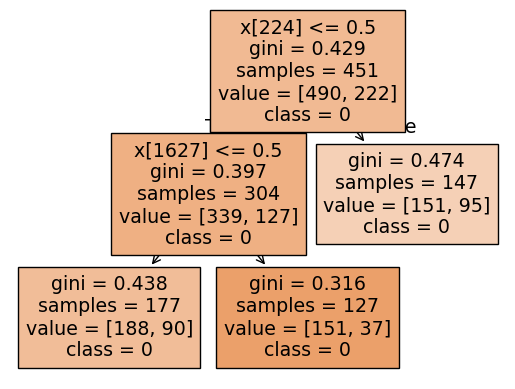

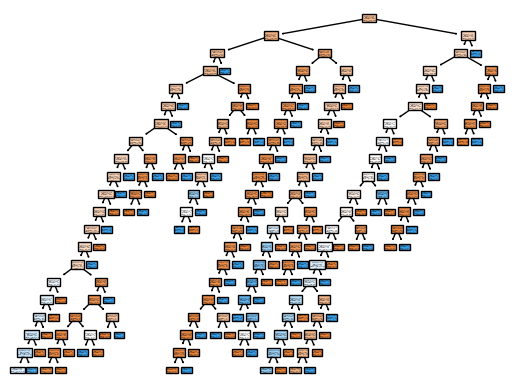

In [36]:
tree.plot_tree(simple_rf.estimators_[0], class_names = ["0", "1", "2"], filled = True)
plt.show()
tree.plot_tree(complex_rf.estimators_[0], class_names = ["0", "1", "2"], filled = True)
plt.show()

In [37]:
def get_metrics(y_train, y_test, y_pred_train, y_pred_test):
    # Calcular métricas para el conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_specificity = specificity_score(y_train, y_pred_train)
    # Calcular métricas para el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_specificity = specificity_score(y_test, y_pred_test)
    # Calcular la diferencia entre métricas de entrenamiento y prueba
    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_specificity = train_specificity - test_specificity
    # Crear un DataFrame con los resultados
    metrics_df = pd.DataFrame([[train_accuracy, train_f1, train_auc, train_precision, train_recall, train_specificity],[test_accuracy, test_f1, test_auc, test_precision, test_recall, test_specificity],[diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall, diff_specificity]],
                              columns = ['Accuracy', 'F1', 'AUC', 'Precision', 'Recall', 'Specificity'],
                              index = ['Train','Test', 'Diferencia'])
    return metrics_df


In [38]:
get_metrics(y_train, y_test, y_complexrf_pred_train, y_complexrf_pred_test)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.980337,0.971774,0.973318,0.995868,0.948819,0.997817
Test,0.854749,0.682927,0.760183,0.965517,0.528302,0.992063
Diferencia,0.125588,0.288847,0.213135,0.030351,0.420517,0.005753


Los resultados muestran que hay overfitting, especialmente en los inddicadores F1, AUC y Recall, debido a que el rendimiento del modelo de entrenamiento es muy superior al de prueba.

Asimismo, a pesar de que la precisión de los modelos de entrenamiento y de prueba es alta, la diferencia observada en el Recall sugiere que el modelo está priorizando la precisión respecto a la sensibilidad. Esto puede generar problemas si el objetivo es capturar la mayor cantidad de positivos. 